In [ ]:
import numpy as np 
import pandas as pd 


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/WordcloudCovid19-master/covid19_tweets.csv")

In [ ]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [ ]:
text = list(df["text"])

In [ ]:
from nltk.tokenize import TweetTokenizer
words = []

In [ ]:
tweet_tok = TweetTokenizer()
print(text[0])
print(tweet_tok.tokenize(text[0]))
for t in text:
    words.extend(tweet_tok.tokenize(t))

If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0
['If', 'I', 'smelled', 'the', 'scent', 'of', 'hand', 'sanitizers', 'today', 'on', 'someone', 'in', 'the', 'past', ',', 'I', 'would', 'think', 'they', 'were', 'so', 'intoxicated', 'that', '…', 'https://t.co/QZvYbrOgb0']


In [ ]:
print(words[:10])

['If', 'I', 'smelled', 'the', 'scent', 'of', 'hand', 'sanitizers', 'today', 'on']


In [ ]:
unique_words = list(set(words))

In [ ]:
count_word = {uw:0 for uw in unique_words}
for w in words:
    count_word[w]+=1

In [ ]:
list(count_word.items())[:10]

[('domain', 9),
 ('https://t.co/gotzsg1w0k', 1),
 ('https://t.co/MDv8H9vNW6', 1),
 ('https://t.co/JUEmlnzxa4', 1),
 ('Isssssa', 1),
 ('@zoedunning', 1),
 ('heebi', 1),
 ('flak', 4),
 ('https://t.co/mnVeoI4EoB', 1),
 ('@Paul_Is_Muadib', 1)]

In [ ]:
wc = list(count_word.items())

In [ ]:
wc_sorted = list(reversed(sorted(wc, key=lambda x: x[1])))

In [ ]:
count_word_sorted = {k:v for k,v in wc_sorted}

In [ ]:
wc_sorted[:10]

[('…', 137352),
 ('the', 89563),
 ('.', 86939),
 (',', 83543),
 ('#COVID19', 80268),
 ('to', 72840),
 ('of', 58731),
 ('in', 50061),
 ('and', 42958),
 ('a', 42942)]

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
tagged = nltk.pos_tag(list(map(lambda x: x[0], wc_sorted)))

In [ ]:
allowed_tags = ["FW", "JJ", "JJR", "JJS", "NN", "NNS", "NNP", "NNPS", "RB", "RBR", "RBS"]
allowed_words =list(filter(lambda x: x[1] in allowed_tags ,tagged))

In [ ]:
allowed_words[:10]

[('’', 'NNS'),
 ('cases', 'NNS'),
 ('s', 'NN'),
 ('new', 'JJ'),
 ('#Covid19', 'JJ'),
 ('COVID', 'NNP'),
 ('not', 'RB'),
 ('people', 'NNS'),
 ('#coronavirus', 'NNS'),
 ('t', 'JJ')]

In [ ]:
allowed_words2 = list(filter(lambda x: len(x[0]) > 1, allowed_words))

In [ ]:
print(allowed_words2[:10])

[('cases', 'NNS'), ('new', 'JJ'), ('#Covid19', 'JJ'), ('COVID', 'NNP'), ('not', 'RB'), ('people', 'NNS'), ('#coronavirus', 'NNS'), ('deaths', 'NNS'), ('pandemic', 'NN'), ('now', 'RB')]


In [ ]:
aw_count = []
for aw in allowed_words2:
    aw_count.append((aw[0], count_word_sorted[aw[0]]))

In [ ]:
aw_sorted = list(reversed(sorted(aw_count, key=lambda x: x[1])))

In [ ]:
aw_sorted[:30]

[('cases', 16682),
 ('new', 10903),
 ('#Covid19', 10480),
 ('COVID', 9106),
 ('not', 8427),
 ('people', 8318),
 ('#coronavirus', 7087),
 ('deaths', 6214),
 ('pandemic', 5296),
 ('now', 5018),
 ('positive', 4203),
 ('so', 4121),
 ('Covid', 3849),
 ('New', 3716),
 ('just', 3653),
 ('today', 3535),
 ('day', 3358),
 ('need', 3288),
 ('How', 3198),
 ('time', 3165),
 ('India', 3163),
 ('last', 3075),
 ('help', 2991),
 ('health', 2973),
 ('August', 2954),
 ('mask', 2952),
 ('there', 2925),
 ('many', 2800),
 ('coronavirus', 2790),
 ('spread', 2662)]

In [ ]:
from wordcloud import WordCloud

In [ ]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
mask = np.array(Image.open("/content/drive/MyDrive/WordcloudCovid19-master/download.png"))

In [ ]:
mask[380:400]

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [ ]:
from random import randint

In [ ]:
def get_color(word, font_size, position, orientation, font_path, random_state):
    return 150 + randint(0,100), 0 + randint(0,100), randint(0, 50)

(-0.5, 4167.5, 4167.5, -0.5)

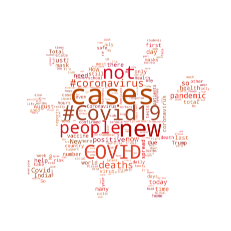

In [ ]:
wordcloud = WordCloud(mask=mask, width=800, height=600, background_color="white", color_func=get_color)
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
text = {k:v for k,v in aw_sorted}

wordcloud.generate_from_frequencies(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

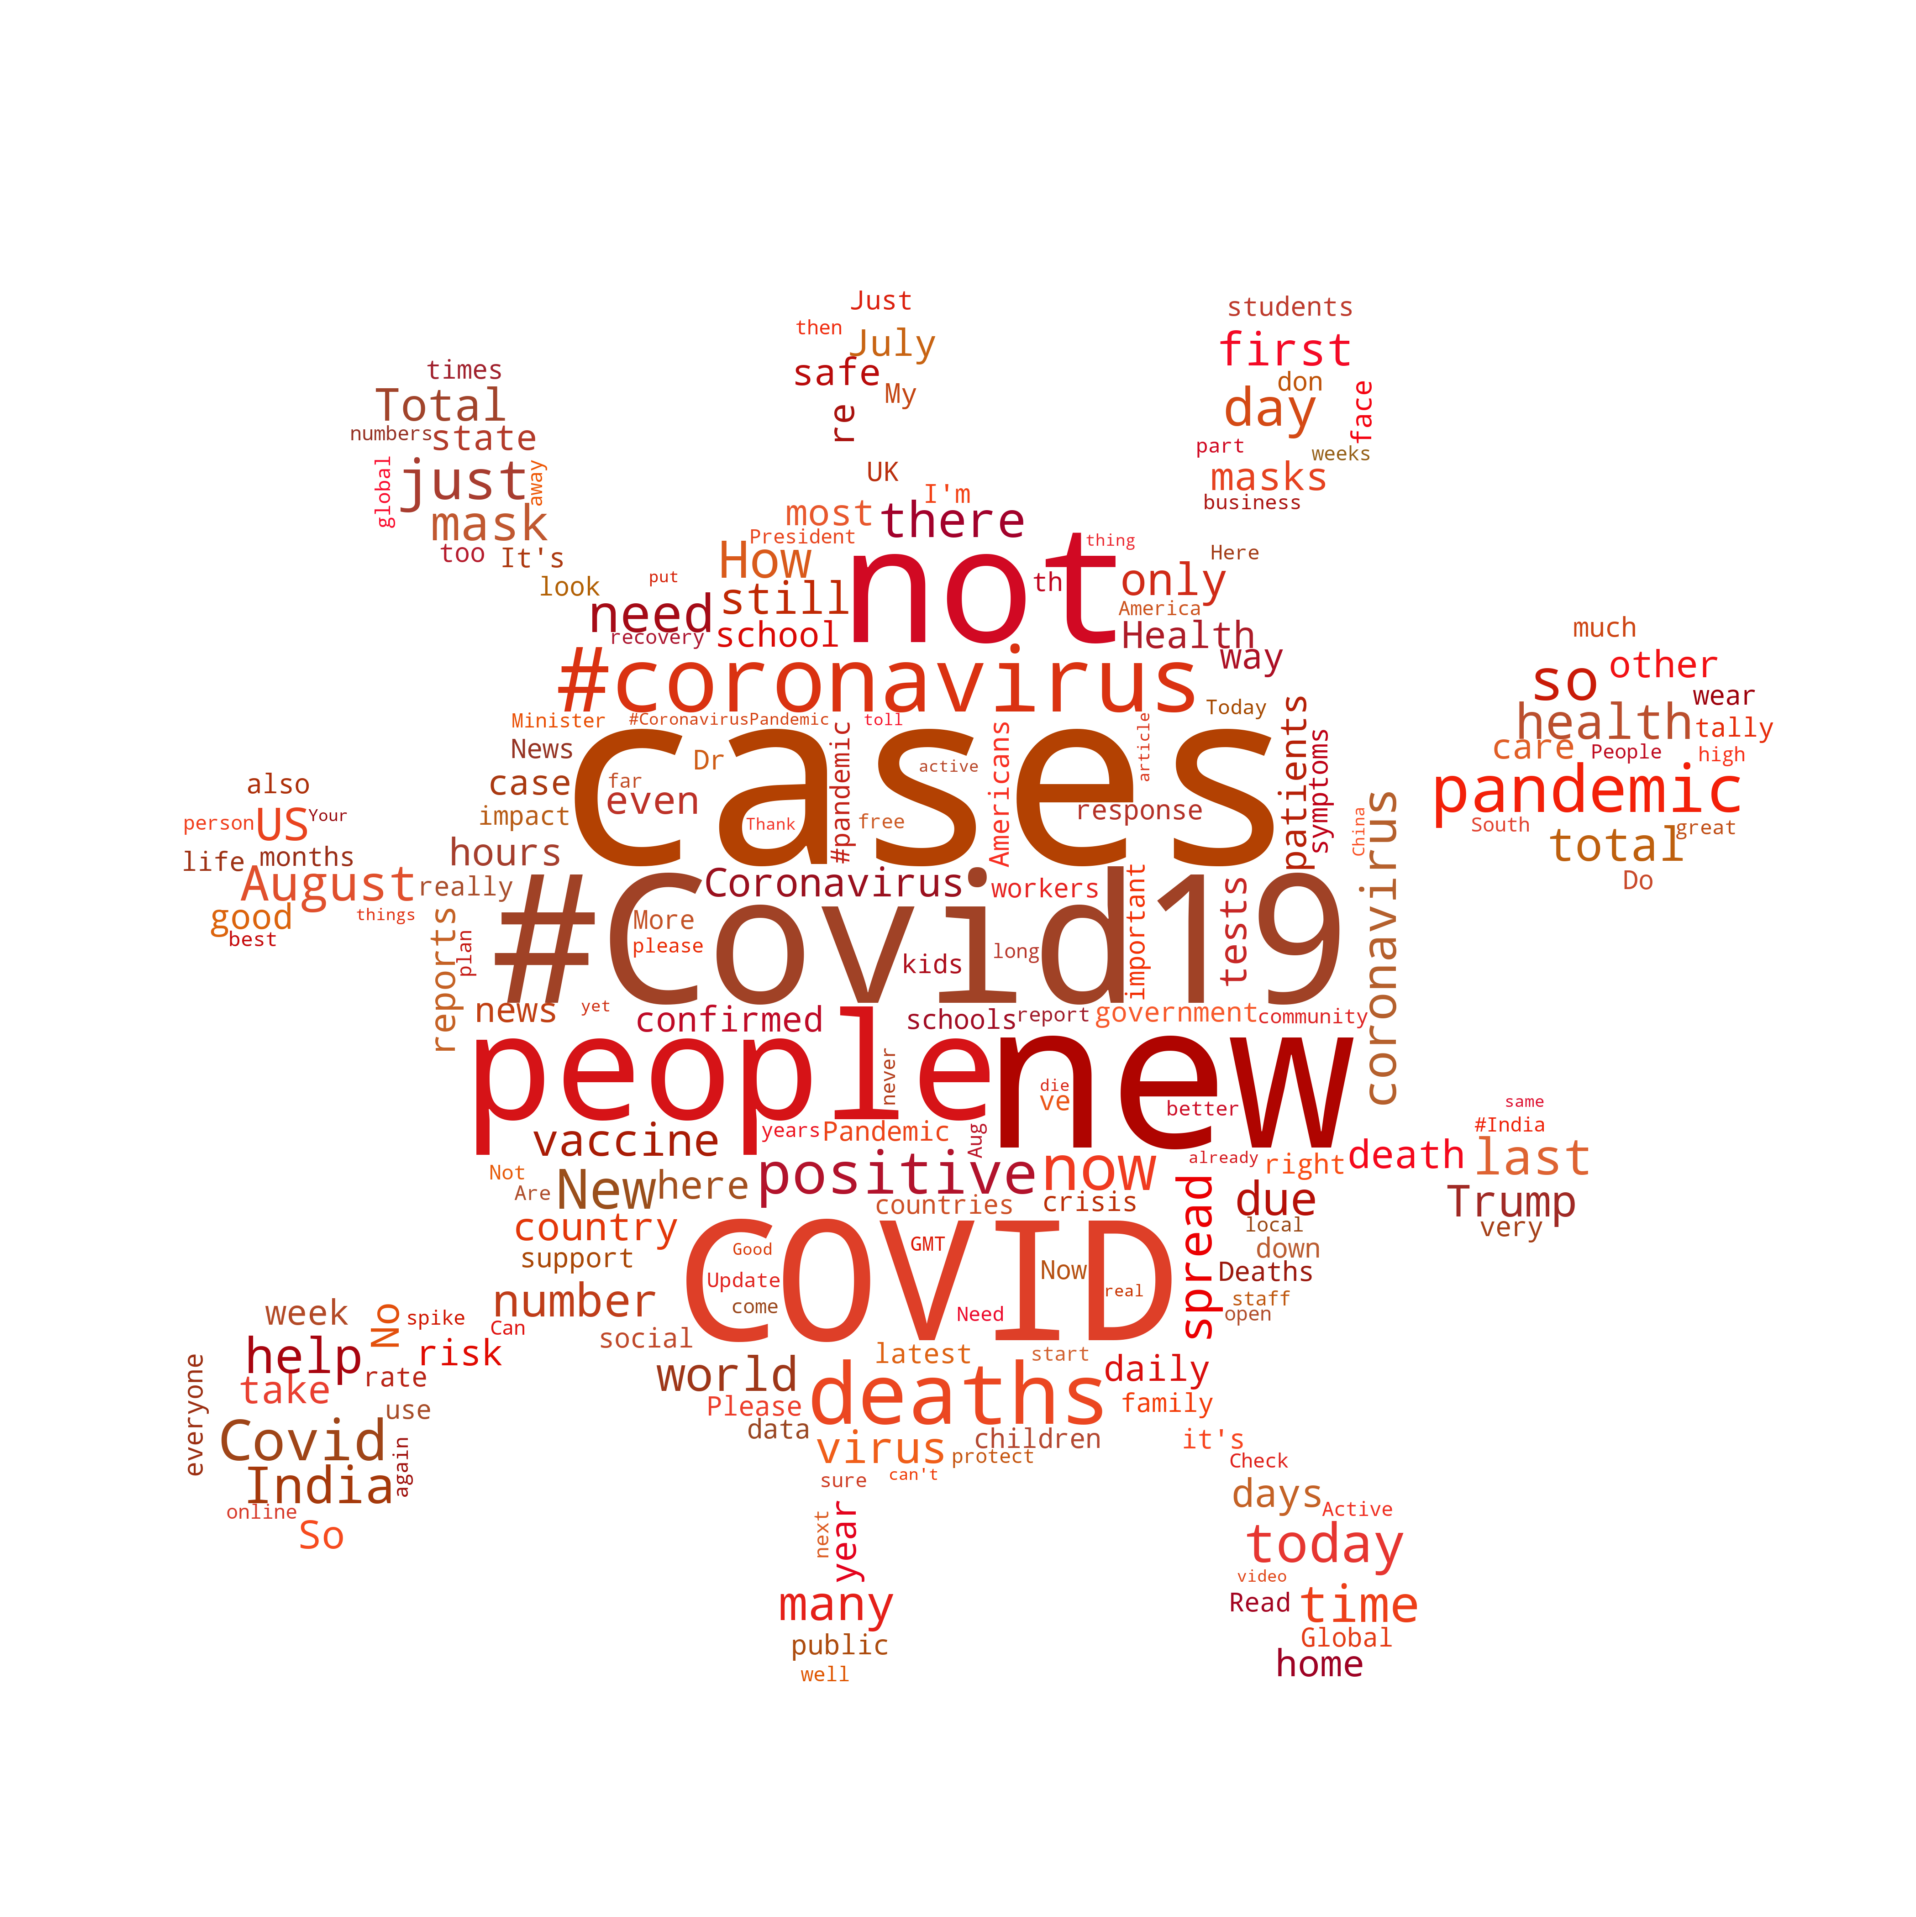

In [ ]:
fig, ax = plt.subplots(figsize=(60, 35))
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
fig.savefig("covid_wordcloud3.png")